In [88]:
# load arrs, pgv2/3/4
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np

np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_data(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

def freeze_array(BA, P):
    P2 = np.zeros_like(P)
    P2[:, 0] = P[:, 0]
    for t in range(1, P.shape[1]):
        if BA[t] == 0:
            P2[:, t] = P[:, t]  # Update to current value in P
        else:
            P2[:, t] = P2[:, t - 1]  # Hold previous value
    return P2

def compare_arrays(pos_arr, pos_plan_arr):
    return np.where(pos_arr == pos_plan_arr, 0, 1)


file_ = 'outer_loop_pg_new_v4f_12_10-080400.pkl' # 'outer_loop_pg_new_v4f_12_10-175620.pkl' #'outer_loop_pg_new_v4f_12_10-173828.pkl' #'outer_loop_pg_new_v4f_12_10-151505.pkl' # 'outer_loop_pg_new_v4f_12_10-084905.pkl' # 'outer_loop_pg_new_v4f_12_10-080400.pkl' # 'outer_loop_pg_new_v4_26_09-022146.pkl' # 'outer_loop_pg_new_v4_24_09-201550.pkl' # 'outer_loop_pg_new_v4_18_09-093520.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'outer_loop_pg_new_v4_ppo_new__19_09-172733.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'sc_project/test_data/outer_loop_pg_new_v4_ppo_new__19_09-172733.pkl' # 'outer_loop_pg_new_v4_17_09-200259.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'outer_loop_pg_new_v3_c__15_09-203653.pkl'
# (other,weights_s) = load_data(file_) # # [VMAPS,STEPS,N]x2,[VMAPS,STEPS,2]x3,[VMAPS,STEPS]x2
other = load_data(file_)
# (r_arr,rt_arr,sample_arr,pos_plan_arr,pos_arr,dot_arr) = other # (r_arr,rt_arr,sample_arr,pos_plan_arr,pos_arr,dot_arr) (r_arr,rt_arr,pos_arr,dot_arr)
(r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr) = other
# sample_arr = compare_arrays(pos_arr, pos_plan_arr)
# print('r_arr.shape=',r_arr.shape,'rt_arr.shape=',rt_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'sample_arr.shape=',sample_arr.shape)
print('r_arr.shape=',r_arr.shape,'rp_arr.shape=',rp_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'sample_arr.shape=',sample_arr.shape)
# pos_plan_arr, pos_arr, dot_arr = pos_plan_arr[:,1:,:], pos_arr[:,1:,:], dot_arr[:,1:,:]

r_arr.shape= (1000, 80) rp_arr.shape= (1000, 80) pos_plan_arr.shape= (1000, 81, 2) pos_arr.shape= (1000, 81, 2) dot_arr.shape= (1000, 81, 2) sample_arr.shape= (1000, 80)


In [139]:
# sort arrs, pgv1/2/3/4
tot_reward = jnp.sum(r_arr, axis=1)
r_tot_desc = jnp.argsort(tot_reward)[::-1]
r_tot_asc = jnp.argsort(tot_reward) #[::-1]
tot_plan = jnp.sum(sample_arr, axis=1)
plan_desc = jnp.argsort(tot_plan)[::-1]
# tot_loss_v = jnp.sum(loss_v_arr_, axis=1)
# loss_v_asc = jnp.argsort(tot_loss_v) #[::-1]
# loss_v_desc = jnp.argsort(tot_loss_v)[::-1]
# tot_loss_d = jnp.sum(loss_d_arr_, axis=1)
# loss_d_asc = jnp.argsort(tot_loss_d) #[::-1]
print('r_tot_desc=',r_tot_desc[:10])
print('r_tot_asc=',r_tot_asc[:10])
print('plan_desc=',plan_desc[:10])
# print('loss_v_asc=',loss_v_asc[:10])
# print('loss_v_desc=',loss_v_desc[:10])
# print('loss_d_asc=',loss_d_asc[:10])

r_tot_desc= [619 516 857 296 536  28 156 766 974 721]
r_tot_asc= [210 483 132 542 264 636 263 440 101 225]
plan_desc= [657 405 855 466 140 858 789 598 528 484]


sample_arr.shape= (1000, 120)
pos_arr.shape= (1000, 121, 2)
pos_plan_arr.shape= (1000, 121, 2)


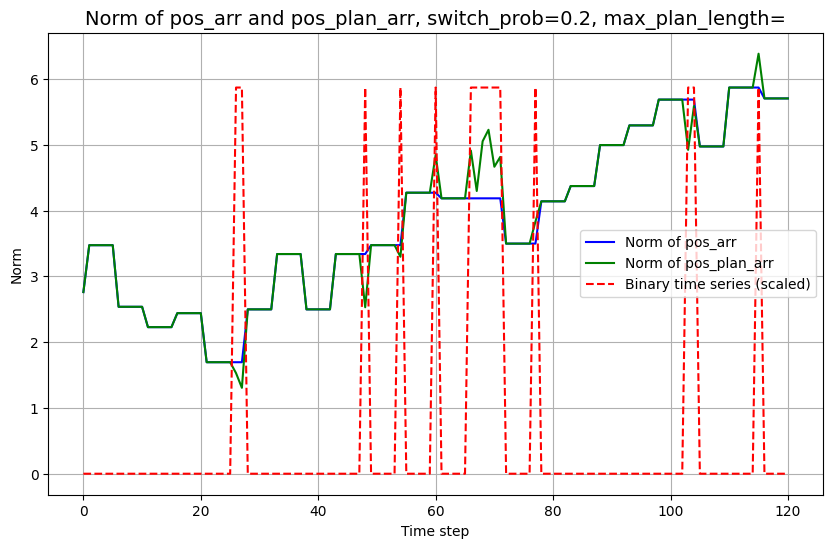

In [45]:
# v2/3, norm of pos_arr and pos_plan_arr:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# plot timeseries, v3
print('sample_arr.shape=',sample_arr.shape)
print('pos_arr.shape=',pos_arr.shape)
print('pos_plan_arr.shape=',pos_plan_arr.shape)

k = 0
binary_array = sample_arr[k,:] # .T, -1
binary_array = jnp.concatenate([jnp.zeros((1,)),binary_array],axis=0)

# Calculate the norms
norm_pos_arr = jnp.linalg.norm(pos_arr[k,:,:], axis=1) # .T
norm_pos_plan_arr = jnp.linalg.norm(pos_plan_arr[k,:,:], axis=1) # .T

# Create the plot
plt.figure(figsize=(10, 6))

# Plotting norms
plt.plot(norm_pos_arr, label="Norm of pos_arr", color='blue')
plt.plot(norm_pos_plan_arr, label="Norm of pos_plan_arr", color='green')

# Plotting binary time series
plt.plot(binary_array * norm_pos_arr.max(), label="Binary time series (scaled)", color='red', linestyle='--')

# Additional plot settings
plt.title(f"Norm of pos_arr and pos_plan_arr, switch_prob={'0.2'}, max_plan_length={''}", fontsize=14)
plt.xlabel("Time step")
plt.ylabel("Norm")
plt.legend()
plt.grid(True)

plt.show()

In [146]:
# full ani pgv2/3 wip
%matplotlib qt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
import functools
from matplotlib.patches import Ellipse

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

def gen_vectors(m, A): # modules/neurons, aperture
    x = np.linspace(-(A-A/m), (A-A/m), m)
    x_ = np.tile(x, (m, ))
    y_ = np.repeat(np.flip(x), m)
    return np.vstack([x_, y_])

def circ_mean_var(v_pred,vec_range):
    v_clamped = np.clip(v_pred,0,None)
    # get x/y coords
    x_y_coords = gen_vectors(np.int32(np.sqrt(len(v_clamped))),vec_range)
    x = x_y_coords[0,:]
    y = x_y_coords[1,:]
    # weighted complex numbers
    z_x = v_pred*(np.cos(x) + 1j*np.sin(x))
    z_y = v_pred*(np.cos(y) + 1j*np.sin(y))
    # mean
    mean_x = np.angle(np.sum(z_x)/np.sum(v_clamped))
    mean_y = np.angle(np.sum(z_y)/np.sum(v_clamped))
    # weighted circular variance for each angle
    circular_var_x = 1 - np.abs(np.sum(z_x) / np.sum(v_clamped))
    circular_var_y = 1 - np.abs(np.sum(z_y) / np.sum(v_clamped))
    circular_cov_matrix = np.diag([circular_var_x, circular_var_y])
    eigvals,eigvecs = np.linalg.eigh(circular_cov_matrix)
    sigma_x,sigma_y = np.sqrt(eigvals)  # no Scale factor for visualization
    return x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y

def set_axis_properties(ax,lim,labels,title=''):
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal', 'box')  
    ax.set_title(title)
    ticks = np.linspace(-lim,lim,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

def get_aperture_points(agent_t,aperture,density):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot,y_tot

def is_point_in_ellipse(x,y,h,k,a,b):
    ellipse_eq = ((x - h)**2)/(a ** 2) + ((y - k)**2)/(b**2)
    return ellipse_eq <= 1

def vonmises_fit(x_coords,y_coords,v_pred_vec):
    # v_pred_vec = np.clip(v_pred_vec,0,None)
    # v_pred_norm = v_pred_vec/np.sum(v_pred_vec)
    scalar = 100
    kappa_max = 2
    integer_weights = np.int32(np.round(v_pred_vec*scalar))
    x_samples = np.repeat(x_coords, integer_weights)
    y_samples = np.repeat(y_coords, integer_weights)
    kappa_x,loc_x,_ = scipy.stats.vonmises.fit(x_samples)
    kappa_y,loc_y,_ = scipy.stats.vonmises.fit(y_samples)
    kappa_x = np.min([kappa_x,kappa_max])
    kappa_y = np.min([kappa_y,kappa_max])
    # mean_magnitude = (np.exp(kappa_x+kappa_y)/((2*np.pi)**2 * scipy.special.i0(kappa_x) * scipy.special.i0(kappa_y)))
    log_numerator = kappa_x + kappa_y
    log_denominator = 2 * np.log(2*np.pi) + np.log(scipy.special.i0(kappa_x)) + np.log(scipy.special.i0(kappa_y))
    log_result = log_numerator - log_denominator
    mean_magnitude = np.exp(log_result)
    return kappa_x,loc_x,kappa_y,loc_y,mean_magnitude

def animate(i,r_arr,dot_arr,pos_plan_arr,pos_arr,dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,L):
    dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
    agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
    agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))
    # dot_hat.set_data(mod_(dot_hat_arr[i, 0]), mod_(dot_hat_arr[i, 1]))

    if i == 0:
        aperture_points.set_color('green')
        # L.get_texts()[0].set_text(f'Frame={i}, Reward=')
    else:
        aperture_points.set_color('black')

    # x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y = circ_mean_var(v_pred_arr[i],np.pi)### think
    # # x_y_coords,x,y,mean_x_ap,mean_y_ap,sigma_x_ap,sigma_y_ap = circ_mean_var(v_pred_arr[i],np.pi)### think
    # ell_circular.set_center((mod_(mean_x+pos_plan_arr[i, 0]), mod_(mean_y+pos_plan_arr[i, 1])))
    # ell_circular.width = SIGMA_SCALE*sigma_x
    # ell_circular.height = SIGMA_SCALE*sigma_y
    # ell_circular_v_pred.set_center((mean_x, mean_y))
    # ell_circular_v_pred.width = SIGMA_SCALE*sigma_x
    # ell_circular_v_pred.height = SIGMA_SCALE*sigma_y
    # ell_circular_v_t.set_center((mean_x, mean_y))
    # ell_circular_v_t.width = SIGMA_SCALE*sigma_x
    # ell_circular_v_t.height = SIGMA_SCALE*sigma_y
    # if i>0:
    #     in_ell_array[i] = is_point_in_ellipse(mod_(mean_x+pos_plan_arr[i, 0]), mod_(mean_y+pos_plan_arr[i, 1]), mod_(dot_arr[i,0]), mod_(dot_arr[i,1]), SIGMA_SCALE*sigma_x, SIGMA_SCALE*sigma_y)
    #     kappa_x,loc_x,kappa_y,loc_y,mean_magnitude = vonmises_fit(x_y_coords[0,:],x_y_coords[1,:],v_pred_arr[i])
    lab = f'Frame={i}, Reward={r_arr[i]:.3f}' #, k={kappa_x:.3f},{kappa_y:.3f}'
    L.get_texts()[0].set_text(lab)

    # scatters_pred.set_offsets(neuron_locs.T)
    # scatters_pred.set_array(v_pred_arr[i])
    # scatters_pred.set_sizes(15 * np.sqrt(v_pred_arr[i])) # []
    # scatters_pred.set_facecolors('k')

    # scatters_t.set_offsets(neuron_locs.T)
    # scatters_t.set_array(v_t_arr[i])
    # scatters_t.set_sizes(15 * np.sqrt(v_t_arr[i])) # []
    # scatters_t.set_facecolors('k')
    x_aperture_plan,y_aperture_plan = get_aperture_points(pos_plan_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points_plan.set_offsets(np.c_[mod_(x_aperture_plan), mod_(y_aperture_plan)])
    x_aperture,y_aperture = get_aperture_points(pos_arr[i],APERTURE,DENSITY_DEFAULT)
    aperture_points.set_offsets(np.c_[mod_(x_aperture), mod_(y_aperture)])
    # x_aperture_centre,y_aperture_centre = get_aperture_points(np.array([0,0]),APERTURE,DENSITY_DEFAULT)
    # aperture_points_v_pred.set_offsets(np.c_[mod_(x_aperture_centre), mod_(y_aperture_centre)])
    # aperture_points_v_t.set_offsets(np.c_[mod_(x_aperture_centre), mod_(y_aperture_centre)])
    x_act_space_plan,y_act_space_plan = get_aperture_points(pos_plan_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points_plan.set_offsets(np.c_[mod_(x_act_space_plan), mod_(y_act_space_plan)])
    x_act_space,y_act_space = get_aperture_points(pos_arr[i],ACTION_SPACE,DENSITY_ACT_PLAN)
    act_space_points.set_offsets(np.c_[mod_(x_act_space), mod_(y_act_space)])

    # x_plan_space,y_plan_space = get_aperture_points(pos_arr[i],PLAN_SPACE,DENSITY_PLAN_SPACE)
    # plan_space_points.set_offsets(np.c_[mod_(x_plan_space), mod_(y_plan_space)])
    
    return [dot,agent_plan,agent,aperture_points_plan,aperture_points,act_space_points_plan,act_space_points,L]

# 449 434 862
k = 657 # 239 # 744 ## 815 ## 273 # 103 # 273 # 743 # 959 # 0,202, 275
interval = 150
APERTURE = (1/2)*np.pi # (3/5)*np.pi # (1/2)*np.pi # (np.sqrt(2)/2)*np.pi # np.pi/2
ACTION_FRAC = 1 # 1/2
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 2 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2
STEPS = pos_arr.shape[1]
MODULES = 7 # 7 # 9 # 17 # 15
# NEURONS_DISP = np.int32(np.sqrt(v_pred_arr.shape[2])) ##14 # 16 # 15 # 15 # 12 # 6 # ''full'' np.int32(NEURONS_AP*(np.pi//APERTURE))
SIGMA_SCALE = 3

DENSITY_DEFAULT = 1000
DENSITY_ACT_PLAN = 15 # 10

# neuron_locs = gen_vectors(NEURONS_DISP,jnp.pi) # NEURONS
# v_pred_arr_ = np.clip(v_pred_arr[k,:,:],0,1)
# v_t_arr_ = v_t_arr[k,:,:]
r_arr_ = r_arr[k,:]
dot_arr_ = dot_arr[k,:,:] # [STEPS,2]
pos_plan_arr_ = pos_plan_arr[k,:,:] # [STEPS,2]
pos_arr_ = pos_arr[k,:,:] # [STEPS,2]
# rel_vec_hat_arr_ = rel_vec_hat_arr[k,:,:] # [STEPS,2]
# dot_hat_arr_ = mod_(rel_vec_hat_arr_ + pos_arr_)

fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

ax_ani = plt.subplot(gs[0:2, 0:2],aspect='equal')
set_axis_properties(ax_ani,jnp.pi,["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
agent_plan, = ax_ani.plot(mod_(pos_plan_arr_[0, 0]), mod_(pos_plan_arr_[0, 1]), color='lightgrey', marker='+', markersize=12) #, label='agent')
agent, = ax_ani.plot(mod_(pos_arr_[0, 0]), mod_(pos_arr_[0, 1]), 'k+', markersize=12) #, label='agent')
dot, = ax_ani.plot(mod_(dot_arr_[0, 0]), mod_(dot_arr_[0, 1]), 'rx', markersize=10) #, label='dot')
text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')
# dot_hat, = ax_ani.plot(mod_(dot_hat_arr_[0, 0]), mod_(dot_hat_arr_[0, 1]), 'bx', markersize=10, label='dot_hat')

aperture_points = ax_ani.scatter([], [], color='black', s=1)
aperture_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)
act_space_points = ax_ani.scatter([], [], color='black', s=1)
act_space_points_plan = ax_ani.scatter([], [], color='lightgrey', s=1)
# plan_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)

# ell_circular = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ell_circular_patch = ax_ani.add_patch(ell_circular)
# text_ani = ax_ani.text(0.5, 0.8, '', transform=ax_ani.transAxes)
# ax_ani.legend(loc='upper left', bbox_to_anchor=(1, 1))
# ax_ani.legend(loc='upper right')
L=ax_ani.legend(loc='upper right')

# in_ell_array = np.zeros(STEPS,)

# ax_pred = plt.subplot(gs[2, 0], aspect='equal')
# # update scatter
# scatters_pred = ax_pred.scatter(
#     neuron_locs[0, :], neuron_locs[1, :], 
#     c='k', # v_pred_arr_[0], 
#     s=15 * np.sqrt(v_pred_arr_[0]), 
#     marker='o',
#     vmin=0, vmax=1)
# aperture_points_v_pred = ax_pred.scatter([], [], color='black', s=0.5)
# ell_circular_v_pred = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ecp_v_pred = ax_pred.add_patch(ell_circular_v_pred)
# set_axis_properties(ax_pred, jnp.pi, ["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"], 'v_pred')

# ax_t = plt.subplot(gs[2, 1], aspect='equal')
# # update scatter
# scatters_t = ax_t.scatter(
#     neuron_locs[0, :], neuron_locs[1, :], 
#     c='k', # v_t_arr_[0], 
#     s=15 * np.sqrt(v_t_arr_[0]), 
#     marker='o',
#     vmin=0, vmax=1)  # Assuming activations range from 0 to 1
# aperture_points_v_t = ax_t.scatter([], [], color='black', s=0.5)
# ell_circular_v_t = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ecp_v_t = ax_t.add_patch(ell_circular_v_t)
# set_axis_properties(ax_t, jnp.pi, ["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"], 'v_t')

partial_animate = functools.partial(
    animate,
    # v_pred_arr=v_pred_arr_, 
    # v_t_arr=v_t_arr_, 
    r_arr=r_arr_,
    dot_arr=dot_arr_, 
    # dot_hat_arr=dot_hat_arr_,
    pos_plan_arr=pos_plan_arr_,
    pos_arr=pos_arr_, 
    dot=dot, 
    # dot_hat=dot_hat,
    agent_plan=agent_plan,
    agent=agent, 
    # neuron_locs=neuron_locs, 
    # scatters_pred=scatters_pred, 
    # scatters_t=scatters_t,
    aperture_points_plan=aperture_points_plan,
    aperture_points=aperture_points,
    # aperture_points_v_pred=aperture_points_v_pred,
    # aperture_points_v_t=aperture_points_v_t,
    act_space_points_plan=act_space_points_plan,
    act_space_points=act_space_points,
    # plan_space_points=plan_space_points,
    # ell_circular=ell_circular,
    # ell_circular_v_pred=ell_circular_v_pred,
    # ell_circular_v_t=ell_circular_v_t,
    # in_ell_array=in_ell_array,
    # text_ani=text_ani,
    # ax_ani=ax_ani,
    L=L,
    )

ani = animation.FuncAnimation(
    fig=fig, 
    func=partial_animate,
    frames=STEPS, 
    blit=True, 
    interval=interval
    )

plt.tight_layout()
plt.show()

# print('in_ell_array=',in_ell_array[1:])
# print(r'% in array = ',np.sum(in_ell_array[1:])/(STEPS-1))

/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_38098/1224039181.py:86: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_38098/1224039181.py:87: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  agent_plan.set_data(mod_(pos_plan_arr[i, 0]), mod_(pos_plan_arr[i, 1]))
/var/folders/hp/sdqbmwnd5m14lcp1k2qjnkx00000gn/T/ipykernel_38098/1224039181.py:88: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))


In [149]:
# load arrs, pgv2/3/4
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np

np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_data(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

def freeze_array(BA, P):
    P2 = np.zeros_like(P)
    P2[:, 0] = P[:, 0]
    for t in range(1, P.shape[1]):
        if BA[t] == 0:
            P2[:, t] = P[:, t]  # Update to current value in P
        else:
            P2[:, t] = P2[:, t - 1]  # Hold previous value
    return P2

def compare_arrays(pos_arr, pos_plan_arr):
    return np.where(pos_arr == pos_plan_arr, 0, 1)


file_ = 'outer_loop_pg_new_v4f_12_10-080400.pkl' # 'outer_loop_pg_new_v4f_12_10-204349.pkl' # 'outer_loop_pg_new_v4f_12_10-084905.pkl' # 'outer_loop_pg_new_v4f_12_10-175620.pkl' #'outer_loop_pg_new_v4f_12_10-173828.pkl' #'outer_loop_pg_new_v4f_12_10-151505.pkl' # 'outer_loop_pg_new_v4f_12_10-084905.pkl' # 'outer_loop_pg_new_v4f_12_10-080400.pkl' # 'outer_loop_pg_new_v4_26_09-022146.pkl' # 'outer_loop_pg_new_v4_24_09-201550.pkl' # 'outer_loop_pg_new_v4_18_09-093520.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'outer_loop_pg_new_v4_ppo_new__19_09-172733.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'sc_project/test_data/outer_loop_pg_new_v4_ppo_new__19_09-172733.pkl' # 'outer_loop_pg_new_v4_17_09-200259.pkl' # 'outer_loop_pg_new_v3_c__18_09-092611.pkl' # 'outer_loop_pg_new_v3_c__15_09-203653.pkl'
# (other,weights_s) = load_data(file_) # # [VMAPS,STEPS,N]x2,[VMAPS,STEPS,2]x3,[VMAPS,STEPS]x2
other = load_data(file_)
# (r_arr,rt_arr,sample_arr,pos_plan_arr,pos_arr,dot_arr) = other # (r_arr,rt_arr,sample_arr,pos_plan_arr,pos_arr,dot_arr) (r_arr,rt_arr,pos_arr,dot_arr)
(r_arr,rp_arr,sample_arr,mask_arr,pos_plan_arr,pos_arr,dot_arr) = other
# sample_arr = compare_arrays(pos_arr, pos_plan_arr)
# print('r_arr.shape=',r_arr.shape,'rt_arr.shape=',rt_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'sample_arr.shape=',sample_arr.shape)
print('r_arr.shape=',r_arr.shape,'rp_arr.shape=',rp_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'pos_arr.shape=',pos_arr.shape,'dot_arr.shape=',dot_arr.shape,'sample_arr.shape=',sample_arr.shape)
# pos_plan_arr, pos_arr, dot_arr = pos_plan_arr[:,1:,:], pos_arr[:,1:,:], dot_arr[:,1:,:]

r_arr.shape= (1000, 80) rp_arr.shape= (1000, 80) pos_plan_arr.shape= (1000, 81, 2) pos_arr.shape= (1000, 81, 2) dot_arr.shape= (1000, 81, 2) sample_arr.shape= (1000, 80)


In [ ]:
# shuffle plans
import numpy as np

# Sample data
sample_arr = np.random.randint(0, 2, (1000, 80))

def shuffle_plans(trial):
    # Number of plans in the trial
    num_plans = np.sum(trial)
    
    # Generate shuffled indices
    shuffled_indices = np.random.permutation(len(trial))
    
    # Create a new trial with moves (0s)
    new_trial = np.zeros_like(trial)
    
    # Place plans (1s) at the first 'num_plans' shuffled indices
    new_trial[shuffled_indices[:num_plans]] = 1
    return new_trial

sample_arr_shuffled = np.array([shuffle_plans(trial) for trial in sample_arr])


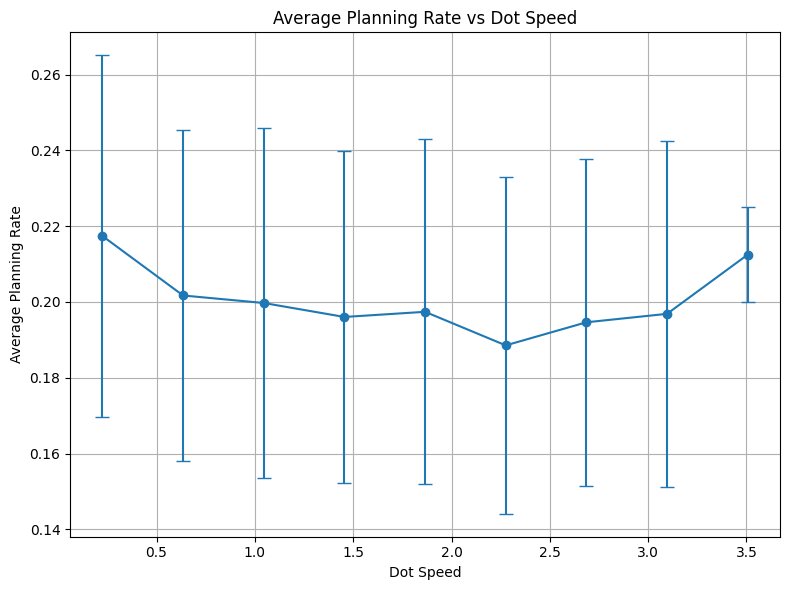

In [150]:
# avg planning rate vs dot speed

%matplotlib inline

dot_positions = dot_arr[:,:,:]
decisions = sample_arr[:,:]

# Assume dot_positions has shape [1000, 121, 2]
# Assume decisions has shape [1000, 120]

# Calculate dot speeds
dot_diffs = np.diff(dot_positions, axis=1)  # Shape: [1000, 120, 2]
dot_speeds = np.linalg.norm(dot_diffs, axis=2)  # Shape: [1000, 120]
mean_dot_speeds = np.mean(dot_speeds, axis=1)  # Shape: [1000]

# Calculate planning rates
planning_rates = np.mean(decisions, axis=1)  # Shape: [1000]

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=10)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# For each speed bin, calculate mean and std of planning rates
mean_rates = []
std_rates = []

for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    rates_in_bin = planning_rates[mask]
    mean_rates.append(np.mean(rates_in_bin))
    std_rates.append(np.std(rates_in_bin))

# Plotting
plt.figure(figsize=(8, 6))
plt.errorbar(speed_bin_centers, mean_rates, yerr=std_rates, fmt='o-', capsize=5)
plt.xlabel('Dot Speed')
plt.ylabel('Average Planning Rate')
plt.title('Average Planning Rate vs Dot Speed')
plt.grid(True)
plt.tight_layout()
plt.show()



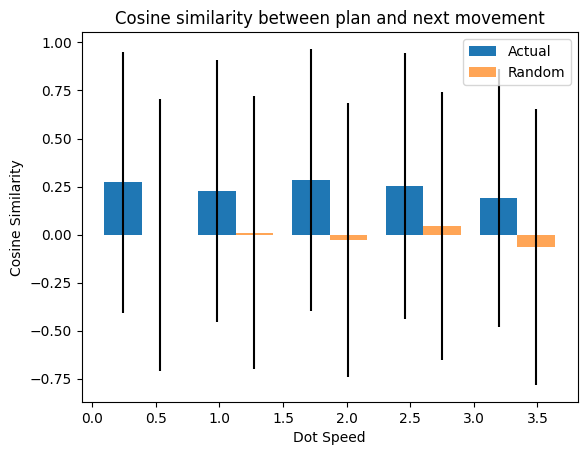

In [177]:
# cos sim between plan / next move with baseline

import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

PLAN_SPACE = np.pi/2
MODULES = 9

x = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
y = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
xv,yv = np.meshgrid(x,y)
random_directions = np.vstack([xv.flatten(), yv.flatten()])

dot_arr_mod = mod_(dot_arr)
pos_arr_mod = mod_(pos_arr)
pos_plan_arr_mod = mod_(pos_plan_arr)

# dot speeds
dot_diffs = np.diff(dot_positions, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=6)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

cos_similarities = []
random_cos_similarities = []

# speed bins
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_decisions = sample_arr[mask]
    masked_pos = pos_arr_mod[mask]
    masked_pos_plan = pos_plan_arr_mod[mask]
    
    similarities = []
    random_similarities = []
    
    # trials in bin
    for decision, pos, pos_plan in zip(masked_decisions, masked_pos, masked_pos_plan):
        # planning periods
        changes = np.diff(np.concatenate([[0], decision, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        
        for start, end in zip(starts, ends):
            plan_traj = pos_plan[end - 1] - pos[start]
            
            if np.linalg.norm(plan_traj) == 0:
                continue  # to avoid /0
                
            norm_plan_traj = plan_traj / np.linalg.norm(plan_traj)
            
            # for actual movement
            if end < len(decision) - 1:  # check if theres a next timestep
                move_dir = pos[end + 1] - pos[end]
                if np.linalg.norm(move_dir) == 0:
                    continue  # to avoid /0
                
                norm_move_dir = move_dir / np.linalg.norm(move_dir)
                cos_sim = np.dot(norm_plan_traj, norm_move_dir)
                similarities.append(cos_sim)

            # random movement
            random_move_dir = np.random.rand(2) * 2 - 1  # direction random_directions[:,np.random.choice(MODULES**2)] # 
            norm_random_move_dir = random_move_dir / np.linalg.norm(random_move_dir)
            random_cos_sim = np.dot(norm_plan_traj, norm_random_move_dir)
            random_similarities.append(random_cos_sim)

    cos_similarities.append((np.mean(similarities), np.std(similarities)))
    random_cos_similarities.append((np.mean(random_similarities), np.std(random_similarities)))

# Plot
means, stds = zip(*cos_similarities)
random_means, random_stds = zip(*random_cos_similarities)
bar_width = (speed_bins[1] - speed_bins[0]) * 0.4
# means *= 1.1

plt.bar(speed_bin_centers - bar_width/2, means, yerr=stds, width=bar_width, label="Actual")
plt.bar(speed_bin_centers + bar_width/2, random_means, yerr=random_stds, width=bar_width, label="Random", alpha=0.7)
# plt.axhline(y=0, color='r', linestyle='--')  # Baseline value
plt.xlabel('Dot Speed')
plt.ylabel('Cosine Similarity')
plt.title('Cosine similarity between plan and next movement')
plt.legend()
plt.show()


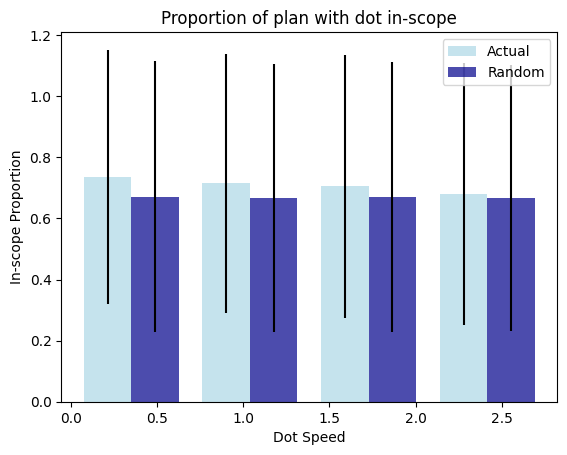

In [135]:
# % plan with in scope, vs random baseline

import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

# data
pos_arr_mod = mod_(pos_arr)
pos_plan_arr_mod = mod_(pos_plan_arr)
dot_arr_mod = mod_(dot_arr)

AP = np.pi/2
PLAN_SPACE = np.pi/2
MODULES = 9
bins = 4

x = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)
y = np.linspace(-PLAN_SPACE,PLAN_SPACE,MODULES)[::-1]
xv,yv = np.meshgrid(x,y)
random_directions = np.vstack([xv.flatten(), yv.flatten()])

# Calculate dot speeds
dot_diffs = np.diff(dot_arr_mod, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=bins+1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Result containers
in_scope_ratios = []
random_in_scope_ratios = []

for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_decisions = sample_arr[mask]
    masked_pos = pos_arr_mod[mask]
    masked_pos_plan = pos_plan_arr_mod[mask]
    masked_dot_positions = dot_arr_mod[mask]
    
    ratios = []
    random_ratios = []
    
    for decision, pos, pos_plan, dot_pos in zip(masked_decisions, masked_pos, masked_pos_plan, masked_dot_positions):
        # Find planning periods
        changes = np.diff(np.concatenate([[0], decision, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        
        for start, end in zip(starts, ends):
            # Handle actual movements
            in_scope_count = 0
            for t in range(start, end):
                if abs(dot_pos[t][0] - pos_plan[t][0]) <= AP or abs(dot_pos[t][1] - pos_plan[t][1]) <= AP:
                    in_scope_count += 1
            ratio = in_scope_count / (end - start)
            ratios.append(ratio)

            # Handle random movements
            random_start_pos = pos[start - 1] if start > 0 else pos[0]
            random_in_scope_count = 0
            for t in range(start, end):
                random_pos = random_start_pos + random_directions[:, np.random.randint(random_directions.shape[1])]
                if abs(dot_pos[t][0] - random_pos[0]) <= AP or abs(dot_pos[t][1] - random_pos[1]) <= AP:
                    random_in_scope_count += 1
            random_ratio = random_in_scope_count / (end - start)
            random_ratios.append(random_ratio)

    in_scope_ratios.append((np.mean(ratios), np.std(ratios)))
    random_in_scope_ratios.append((np.mean(random_ratios), np.std(random_ratios)))

# Plot
means, stds = zip(*in_scope_ratios)
random_means, random_stds = zip(*random_in_scope_ratios)
bar_width = (speed_bins[1] - speed_bins[0]) * 0.4

plt.bar(speed_bin_centers - bar_width/2, means, yerr=stds, width=bar_width, label='Actual', color='lightblue',alpha=0.7)
plt.bar(speed_bin_centers + bar_width/2, random_means, yerr=random_stds, width=bar_width, label='Random', color='darkblue',alpha=0.7)
# plt.axhline(y=np.mean(random_means), color='r', linestyle='--', label='Random Baseline')
plt.xlabel('Dot Speed')
plt.ylabel('In-scope Proportion')
plt.title('Proportion of plan with dot in-scope')
plt.legend()
plt.show()



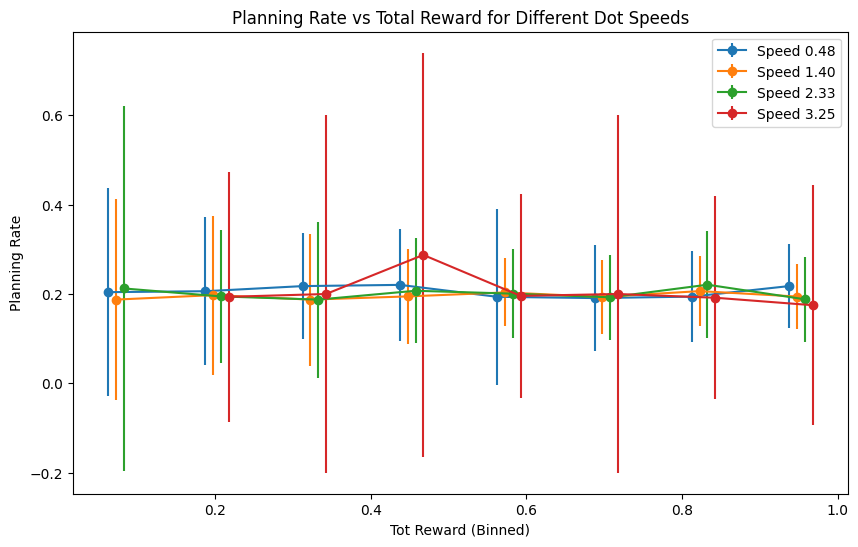

In [167]:
# plan rate vs tot reward, binned for dot speed

import numpy as np
import matplotlib.pyplot as plt

sbins = 4

# dot speeds
dot_diffs = np.diff(dot_positions, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# reward bins
reward_bins = np.linspace(0, 1, 9)
reward_bin_centers = (reward_bins[:-1] + reward_bins[1:]) / 2

plt.figure(figsize=(10, 6))

# speed bin
for s in range(len(speed_bins) - 1):
    mask_speed = (mean_dot_speeds >= speed_bins[s]) & (mean_dot_speeds < speed_bins[s + 1])
    
    planning_rates_per_speed = []
    planning_std_per_speed = []

    # reward bin
    for r in range(len(reward_bins) - 1):
        mask_reward = (np.sum(r_arr, axis=1) >= reward_bins[r]) & (np.sum(r_arr, axis=1) < reward_bins[r + 1])
        
        # decisions for both speed and reward conditions
        masked_decisions = sample_arr[mask_speed & mask_reward]
        
        # planning rate for this bin
        rate = np.mean(masked_decisions)
        planning_rates_per_speed.append(rate)
        planning_std_per_speed.append(np.std(masked_decisions)/np.sqrt(len(masked_decisions)))

    plt.errorbar(reward_bin_centers + s*0.01, planning_rates_per_speed, yerr=planning_std_per_speed, linestyle='-', marker='o', label=f"Speed {speed_bin_centers[s]:.2f}")

plt.xlabel('Tot Reward (Binned)')
plt.ylabel('Planning Rate')
plt.title('Planning Rate vs Total Reward for Different Dot Speeds')
plt.legend()
plt.show()


pr= [0.28828827]
pr= [0.28828827, 0.28169015]
pr= [0.28828827, 0.28169015, 0.16666669]
pr= [0.28828827, 0.28169015, 0.16666669, 0.20833334]


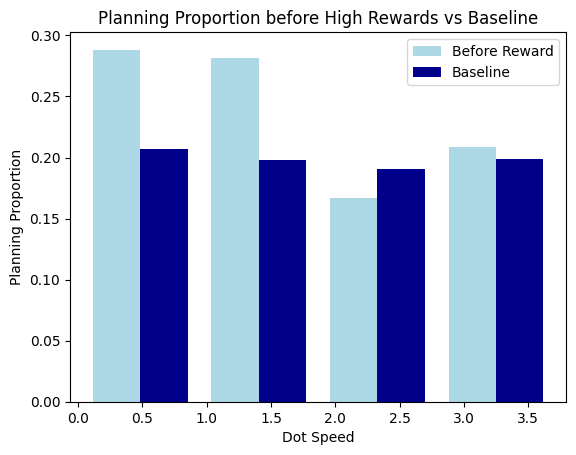

In [178]:
# plan rate before reward

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Constants (adjustable)
PREVIOUS_STEPS = 3
REWARD_THRESHOLD = 0.9
sbins = 4

# Calculate dot speeds (assuming you have dot_positions as before)
dot_diffs = np.diff(dot_positions, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=sbins + 1)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Result containers
plan_ratios = []
baseline_ratios = []

# For each speed bin
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    masked_decisions = sample_arr[mask]
    masked_rewards = r_arr[mask]

    all_plans_before_rewards = []
    for trial_num, (decision, rewards) in enumerate(zip(masked_decisions, masked_rewards)):
        high_reward_indices = np.where(rewards > REWARD_THRESHOLD)[0]
        
        if len(high_reward_indices) == 0:
            # print(f"{trial_num} has no rewards")
            continue

        planning_periods_before_rewards = []
        for idx in high_reward_indices:
            start_idx = max(0, idx-PREVIOUS_STEPS)
            if start_idx >= idx:
                # print(f"Insufficient steps before high reward at index {idx} in trial {trial_num}.")
                continue

            planning_rate = np.mean(decision[start_idx:idx])
            planning_periods_before_rewards.append(planning_rate)

        if not planning_periods_before_rewards:
            # print(f"Trial {trial_num} had high rewards but no valid planning rates were calculated.")
            continue

        all_plans_before_rewards.extend(planning_periods_before_rewards)


    plan_ratios.append(np.mean(all_plans_before_rewards))
    print('pr=',plan_ratios)
    baseline_ratios.append(np.mean(masked_decisions))

# Plot
bar_width = (speed_bins[1] - speed_bins[0]) * 0.4
plt.bar(speed_bin_centers - bar_width/2, plan_ratios, width=bar_width, label="Before Reward", color="lightblue")
plt.bar(speed_bin_centers + bar_width/2, baseline_ratios, width=bar_width, label="Baseline", color="darkblue")
plt.xlabel('Dot Speed')
plt.ylabel('Planning Proportion')
plt.title('Planning Proportion before High Rewards vs Baseline')
plt.legend()
plt.show()


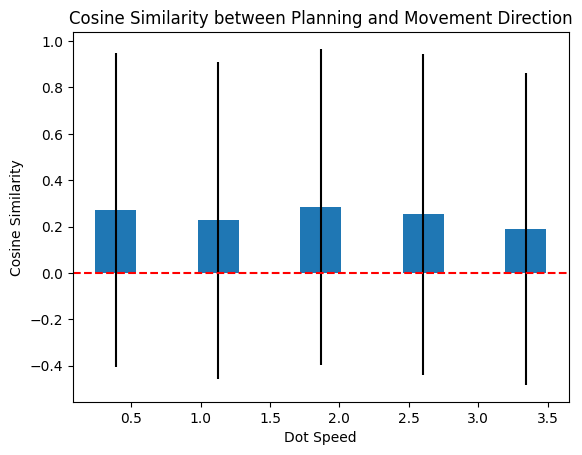

In [153]:
# cos sim plan/next move (OLD)

import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

# Sample Data
dot_arr_mod = mod_(dot_arr) #np.random.rand(1000, 121, 2)
pos_arr_mod = mod_(pos_arr)
pos_plan_arr_mod = mod_(pos_plan_arr)

# Calculate dot speeds
dot_diffs = np.diff(dot_positions, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=6)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Result containers
cos_similarities = []

# For each speed bin
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_decisions = sample_arr[mask]
    masked_pos = pos_arr_mod[mask]
    masked_pos_plan = pos_plan_arr_mod[mask]
    
    similarities = []
    
    # For each trial in the bin
    for decision, pos, pos_plan in zip(masked_decisions, masked_pos, masked_pos_plan):
        # Find the planning periods
        changes = np.diff(np.concatenate([[0], decision, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        
        for start, end in zip(starts, ends):
            plan_traj = pos_plan[end - 1] - pos[start]
            
            if np.linalg.norm(plan_traj) == 0:
                continue  # skip if plan_traj is a zero vector, to avoid /0
                
            norm_plan_traj = plan_traj / np.linalg.norm(plan_traj)
            
            if end < len(decision) - 1:  # check if there's a next timestep
                move_dir = pos[end + 1] - pos[end]
                if np.linalg.norm(move_dir) == 0:
                    continue  # skip if move_dir is a zero vector, to avoid /0
                            
                norm_move_dir = move_dir / np.linalg.norm(move_dir)
                cos_sim = np.dot(norm_plan_traj, norm_move_dir)
                similarities.append(cos_sim)
                
    if similarities:  # If there are any valid similarities
        cos_similarities.append((np.mean(similarities), np.std(similarities)))
    else:
        cos_similarities.append((np.nan, np.nan))  # default value if no valid similarities in the bin
        
# Plot
means, stds = zip(*cos_similarities)
bar_width = (speed_bins[1] - speed_bins[0]) * 0.4

plt.bar(speed_bin_centers, means, yerr=stds, width=bar_width)
plt.axhline(y=0, color='r', linestyle='--')  # Replace 0 with your baseline value
plt.xlabel('Dot Speed')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity between plan and next move')
plt.show()


In [134]:
# % in scope (old)

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

# Data
pos_plan_arr_mod = mod_(pos_plan_arr)
dot_arr_mod = mod_(dot_arr)
AP = np.pi/2

# Calculate dot speeds
dot_diffs = np.diff(dot_arr_mod, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=6)
speed_bin_centers = (speed_bins[:-1] + speed_bins[1:]) / 2

# Result containers
in_scope_ratios = []

# For each speed bin
for i in range(len(speed_bins) - 1):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    
    masked_decisions = sample_arr[mask]
    masked_dot = dot_arr_mod[mask] #pos_arr[mask]
    masked_pos_plan = pos_plan_arr_mod[mask]
    
    ratios = []
    
    # For each trial in the bin
    for decision, dot, plan_pos in zip(masked_decisions, masked_dot, masked_pos_plan):
        # Find the planning periods
        changes = np.diff(np.concatenate([[0], decision, [0]]))
        starts = np.where(changes == 1)[0]
        ends = np.where(changes == -1)[0]
        # print('decision=',decision,'dot_pos=',dot_pos,'plan_pos=',plan_pos)
        # print('changes=',changes,'starts=',starts,'ends=',ends)
        
        for start, end in zip(starts, ends):
            in_scope_count = 0
            for t in range(start, end):
                # Check if dot is "in scope"
                horizontal_dist = np.abs(dot[t][0] - plan_pos[t][0])
                vertical_dist = np.abs(dot[t][1] - plan_pos[t][1])
                print('dot=',dot[t],'plan_pos=',plan_pos[t])
                
                if horizontal_dist <= AP or vertical_dist <= AP:
                    # print('yes')
                    in_scope_count += 1

            
            ratio = in_scope_count / (end - start)
            ratios.append(ratio)
                
    in_scope_ratios.append((np.mean(ratios), np.std(ratios)))

# Plot
means, stds = zip(*in_scope_ratios)
plt.bar(speed_bin_centers, means, yerr=stds, width=speed_bins[1] - speed_bins[0])
plt.xlabel('Dot Speed')
plt.ylabel('Proportion In-Scope')
plt.title('Proportion of plan with dot in-scope')
plt.show()

print('means=',means)

dot= [-1.1156449 -1.450117 ] plan_pos= [ 0.11607385 -0.34359217]
dot= [-1.0944681 -1.3632307] plan_pos= [-0.2766254  0.8345053]
dot= [-0.96740746 -0.841913  ] plan_pos= [-1.4547225   0.44180608]
dot= [-0.94623065 -0.7550266 ] plan_pos= [-0.6693244   0.44180608]
dot= [ 0.02790022 -3.0414412 ] plan_pos= [-2.6328194 -1.5216898]
dot= [ 0.26084447 -2.0856907 ] plan_pos= [-1.8474219 -1.1289909]
dot= [ 2.4238155 -1.918406 ] plan_pos= [0.5396693  0.47322798]
dot= [ 0.30317926 -1.740252  ] plan_pos= [ 1.7177665 -3.0610638]
dot= [ 0.17063951 -1.7291174 ] plan_pos= [ 0.9323685 -2.2756658]
dot= [-0.624599  -1.6623096] plan_pos= [1.3250673 2.436724 ]
dot= [-1.4198372 -1.5955019] plan_pos= [2.5031645 0.865927 ]
dot= [-1.552377  -1.5843673] plan_pos= [2.5031645 2.436724 ]
dot= [-1.4168402  -0.07669353] plan_pos= [-1.0433383 -1.6343565]
dot= [ 1.664839  -1.3937428] plan_pos= [-2.6141343  1.899935 ]
dot= [-2.0571322 -1.9444344] plan_pos= [-0.05384088 -0.26968026]
dot= [ 1.1426051 -0.6254723] plan_pos= 

KeyboardInterrupt: 

plan_periods= [ 0  1  7  8 54 65]
move_after_plan= [0. 0.]
plan_periods= [15 31 32 38 44 45]
move_after_plan= [0. 0.]
plan_periods= [10 46]
move_after_plan= [0. 0.]
plan_periods= [20 36 52 63 69 70]
move_after_plan= [0. 0.]
plan_periods= [ 0 16 17 23 39 40 61 62 68 79]
move_after_plan= [0. 0.]
plan_periods= [15 31 37 43 74]
move_after_plan= [0. 0.]
plan_periods= [ 0  1  7  8 24 65 71 77 78]
move_after_plan= [0. 0.]
plan_periods= [ 0 21 22 28 39 60]
move_after_plan= [0. 0.]
plan_periods= [30 46]
move_after_plan= [0. 0.]
plan_periods= [10 16 22 33 69 70]
move_after_plan= [0. 0.]
plan_periods= [ 0  6 67 68 69]
move_after_plan= [0. 0.]
plan_periods= [10 21 32 38 69 70]
move_after_plan= [0. 0.]
plan_periods= [ 0 11 37 58 59 75]
move_after_plan= [0. 0.]
plan_periods= [10 11 17 48 74]
move_after_plan= [0. 0.]
plan_periods= [25 31 37 78 79]
move_after_plan= [0. 0.]
plan_periods= [10 31 57 68]
move_after_plan= [0. 0.]
plan_periods= [60 76]
move_after_plan= [0. 0.]
plan_periods= [ 5 11 32 53]
mo

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret =

move_after_plan= [0. 0.]
plan_periods= [ 5 11 17 48 54 60]
move_after_plan= [0. 0.]
plan_periods= [ 0  6 12 18 29 30 36 37 48 64 70]
move_after_plan= [0. 0.]
plan_periods= [ 5  6  7  8 19 50 71 77 78 79]
move_after_plan= [0. 0.]
plan_periods= [ 5  6 17 43 44]
move_after_plan= [0. 0.]
plan_periods= [20 26 42 43]
move_after_plan= [0. 0.]
plan_periods= [30 36 37 38 39 40 61 67 73 74]
move_after_plan= [0. 0.]
plan_periods= [15 16 22 23 44 60 71]
move_after_plan= [0. 0.]
plan_periods= [ 5 76]
move_after_plan= [0. 0.]
plan_periods= [10 31 62 63 69]
move_after_plan= [0. 0.]
plan_periods= [ 0  6  7  8 14 15 36 42 63 64 65 71 72]
move_after_plan= [0. 0.]
plan_periods= [ 5 16 22 38 49 75 76 77 78]
move_after_plan= [0. 0.]
plan_periods= [ 5 11 57 63 74 75 76]
move_after_plan= [0. 0.]
plan_periods= [ 5 16 32 33 44 45]
move_after_plan= [0. 0.]
plan_periods= [ 0  1  7  8  9 15 16 27 43 49]
move_after_plan= [0. 0.]
plan_periods= [10 31 42 68]
move_after_plan= [0. 0.]
plan_periods= [10 31 42 53 64 70]

/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/Users/lukej/Documents/meta_rl_ego_sim/venv3/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All-NaN axis encountered
  maxy = np.nanmax(masked_verts[..., 1])


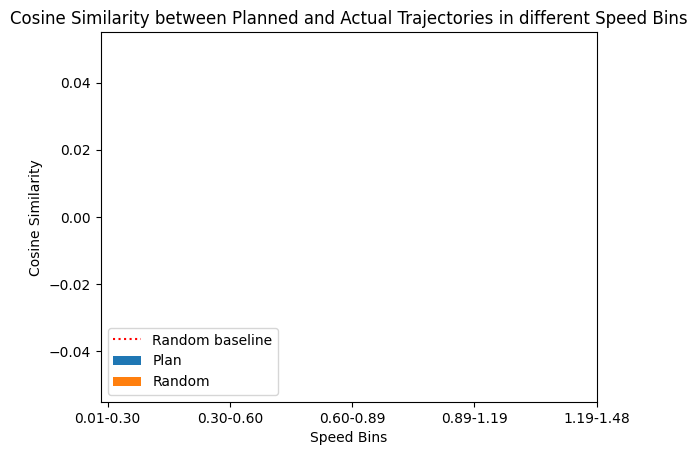

In [136]:
# old vers

import numpy as np
import matplotlib.pyplot as plt
import scipy

%matplotlib inline

bins = 5
ACTION_SPACE = np.pi/2
MODULES = 9

def get_cosine_similarity(a, b):
    return 1 - scipy.spatial.distance.cosine(a, b)

x = jnp.linspace(-ACTION_SPACE,ACTION_SPACE,MODULES) ## (finer resolution)
y = jnp.linspace(-ACTION_SPACE,ACTION_SPACE,MODULES)[::-1]
xv,yv = jnp.meshgrid(x,y)
vectors = jnp.vstack([xv.flatten(),yv.flatten()])

# Calculate dot speeds
dot_diffs = np.diff(dot_arr, axis=1)
dot_speeds = np.linalg.norm(dot_diffs, axis=2)
mean_dot_speeds = np.mean(dot_speeds, axis=1)

# Define speed bins
speed_bins = np.linspace(np.min(mean_dot_speeds), np.max(mean_dot_speeds), num=bins+1)

# Store cosine similarities
bin_cosine_similarities = []
bin_random_cosine_similarities = []

for i in range(bins):
    mask = (mean_dot_speeds >= speed_bins[i]) & (mean_dot_speeds < speed_bins[i + 1])
    masked_samples = sample_arr[mask]
    masked_pos = pos_arr[mask]
    masked_pos_plan = pos_plan_arr[mask]

    cosine_similarities = []
    random_cosine_similarities = []
    
    for trial in range(masked_pos.shape[0]):
        plan_periods = np.where(masked_samples[trial] == 1)[0]
        print('plan_periods=',plan_periods)
        
        if not len(plan_periods): # as long as there _are_ plans
            continue
        
        start_time = plan_periods[0]
        end_time = plan_periods[-1]  # Including the first move after the plan finishes
        
        plan_traj = masked_pos_plan[trial, end_time] - masked_pos[trial, start_time]
        # print('plan_traj=',plan_traj)
        
        # Ensure plan_traj is not a zero vector to avoid division by zero when normalizing
        if np.linalg.norm(plan_traj) == 0:
            continue
        
        plan_traj_normalized = plan_traj / np.linalg.norm(plan_traj)
        # print('plan_traj_normalized=',plan_traj_normalized)
        
        move_after_plan = masked_pos[trial, end_time + 1] - masked_pos[trial, end_time]
        print('move_after_plan=',move_after_plan)
        if np.linalg.norm(move_after_plan) == 0:
            continue
        
        move_after_plan_normalized = move_after_plan / np.linalg.norm(move_after_plan)
        print('move_after_plan_normalized=',move_after_plan_normalized)
        
        cosine_similarity = get_cosine_similarity(plan_traj_normalized, move_after_plan_normalized)
        print('cosine_similarity=',cosine_similarity)

        cosine_similarities.append(cosine_similarity)
        
        # Compare with random plans
        for vector in vectors.T:
            vector_norm = vector / np.linalg.norm(vector)
            random_cosine_similarity = cosine_similarity(plan_traj_normalized, vector_norm)
            random_cosine_similarities.append(random_cosine_similarity)
    
    bin_cosine_similarities.append((np.mean(cosine_similarities), np.std(cosine_similarities)))
    bin_random_cosine_similarities.append((np.mean(random_cosine_similarities), np.std(random_cosine_similarities)))

# Plotting
x = np.arange(len(bin_cosine_similarities))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, [mean for mean, std in bin_cosine_similarities], width, label='Plan', yerr=[std for mean, std in bin_cosine_similarities])
rects2 = ax.bar(x + width/2, [mean for mean, std in bin_random_cosine_similarities], width, label='Random', yerr=[std for mean, std in bin_random_cosine_similarities])

ax.axhline(y=np.mean([mean for mean, std in bin_random_cosine_similarities]), color='r', linestyle='dotted', label='Random baseline')
ax.set_xlabel('Speed Bins')
ax.set_ylabel('Cosine Similarity')
ax.set_title('Cosine Similarity between Planned and Actual Trajectories in different Speed Bins')
ax.set_xticks(x)
ax.set_xticklabels([f'{speed_bins[i]:.2f}-{speed_bins[i + 1]:.2f}' for i in range(len(speed_bins) - 1)])
ax.legend()

plt.show()


In [ ]:
# v1 (no plan)

In [ ]:
# load arrs, pgv1
import jax
import jax.numpy as jnp
from jax import jit
import jax.random as rnd
import numpy as np

np.set_printoptions(threshold=1000, linewidth=200)
import matplotlib
matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker
import matplotlib.cm as cm
from matplotlib.patches import Ellipse
import os
import functools

def load_data(str_):
    path_ = os.path.dirname(os.getcwd()) + '/sc_project/test_data/' # Path(__file__).resolve().parents[1]
    with open(path_+str_,'rb') as file_:
        # param = pickle.load(file_)
        param_ = jnp.load(file_,allow_pickle=True)
    return param_

def freeze_array(BA, P):
    P2 = np.zeros_like(P)
    P2[:, 0] = P[:, 0]
    for t in range(1, P.shape[1]):
        if BA[t] == 0:
            P2[:, t] = P[:, t]  # Update to current value in P
        else:
            P2[:, t] = P2[:, t - 1]  # Hold previous value
    return P2

# file_ = 'outer_loop_pg_new_v1_ppo__10_09-072009.pkl'

file_ = 'outer_loop_pg_new_v1_ppo_c_init__15_09-082206.pkl' # 'outer_loop_pg_new_v3__11_09-200631.pkl' # 'outer_loop_pg_new_v1__27_08-15_S39.pkl'
# (other,weights_s) = load_data(file_) # # [VMAPS,STEPS,N]x2,[VMAPS,STEPS,2]x3,[VMAPS,STEPS]x2
other = load_data(file_)
(r_arr,rt_arr,pos_arr,dot_arr) = other ##sample_arr (r_arr,rt_arr,pos_arr,dot_arr)
print('r_arr.shape=',r_arr.shape,'rt_arr.shape=',rt_arr.shape,'pos_plan_arr.shape=',pos_plan_arr.shape,'dot_arr.shape=',dot_arr.shape) #,'sample_arr.shape=',sample_arr.shape)
# print('weights_s["Us_f"].shape=',weights_s["Us_f"].shape)

# pos_arr = np.zeros_like(pos_plan_arr)
# for i in range(pos_plan_arr.shape[0]):
#     pos_arr[i,:,:] = freeze_array(sample_arr[i,:].T,pos_plan_arr[i,:,:]) # pm_arr[]
# print('pos_arr.shape=',pos_arr.shape)

print('pos_arr=',pos_arr[0,:,:])

In [ ]:
# sort arrs, pgv1/2/3
tot_reward = jnp.sum(r_arr, axis=1)
r_tot_desc = jnp.argsort(tot_reward)[::-1]
r_tot_asc = jnp.argsort(tot_reward) #[::-1]
# tot_loss_v = jnp.sum(loss_v_arr_, axis=1)
# loss_v_asc = jnp.argsort(tot_loss_v) #[::-1]
# loss_v_desc = jnp.argsort(tot_loss_v)[::-1]
# tot_loss_d = jnp.sum(loss_d_arr_, axis=1)
# loss_d_asc = jnp.argsort(tot_loss_d) #[::-1]
print('r_tot_desc=',r_tot_desc[:10])
print('r_tot_asc=',r_tot_asc[:10])
# print('loss_v_asc=',loss_v_asc[:10])
# print('loss_v_desc=',loss_v_desc[:10])
# print('loss_d_asc=',loss_d_asc[:10])

In [ ]:
# full ani pgv1 wip
%matplotlib qt
import numpy as np
import scipy
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.animation as animation
import functools
from matplotlib.patches import Ellipse

def mod_(x):
    return (x + np.pi) % (2 * np.pi) - np.pi

def gen_vectors(m, A): # modules/neurons, aperture
    x = np.linspace(-(A-A/m), (A-A/m), m)
    x_ = np.tile(x, (m, ))
    y_ = np.repeat(np.flip(x), m)
    return np.vstack([x_, y_])

def circ_mean_var(v_pred,vec_range):
    v_clamped = np.clip(v_pred,0,None)
    # get x/y coords
    x_y_coords = gen_vectors(np.int32(np.sqrt(len(v_clamped))),vec_range)
    x = x_y_coords[0,:]
    y = x_y_coords[1,:]
    # weighted complex numbers
    z_x = v_pred*(np.cos(x) + 1j*np.sin(x))
    z_y = v_pred*(np.cos(y) + 1j*np.sin(y))
    # mean
    mean_x = np.angle(np.sum(z_x)/np.sum(v_clamped))
    mean_y = np.angle(np.sum(z_y)/np.sum(v_clamped))
    # weighted circular variance for each angle
    circular_var_x = 1 - np.abs(np.sum(z_x) / np.sum(v_clamped))
    circular_var_y = 1 - np.abs(np.sum(z_y) / np.sum(v_clamped))
    circular_cov_matrix = np.diag([circular_var_x, circular_var_y])
    eigvals,eigvecs = np.linalg.eigh(circular_cov_matrix)
    sigma_x,sigma_y = np.sqrt(eigvals)  # no Scale factor for visualization
    return x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y

def set_axis_properties(ax,lim,labels,title=''):
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_aspect('equal', 'box')  
    ax.set_title(title)
    ticks = np.linspace(-lim,lim,5)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)

def get_aperture_points(agent_t,aperture,density):
    x_horizontal = np.linspace(agent_t[0] - aperture, agent_t[0] + aperture, density)
    y_top = np.full(density, agent_t[1] + aperture)
    y_bottom = np.full(density, agent_t[1] - aperture)
    y_vertical = np.linspace(agent_t[1] - aperture, agent_t[1] + aperture, density)
    x_left = np.full(density, agent_t[0] - aperture)
    x_right = np.full(density, agent_t[0] + aperture)
    x_tot = np.concatenate([x_left, x_right, x_horizontal, x_horizontal])
    y_tot = np.concatenate([y_vertical, y_vertical, y_bottom, y_top])
    return x_tot,y_tot

def is_point_in_ellipse(x,y,h,k,a,b):
    ellipse_eq = ((x - h)**2)/(a ** 2) + ((y - k)**2)/(b**2)
    return ellipse_eq <= 1

def vonmises_fit(x_coords,y_coords,v_pred_vec):
    # v_pred_vec = np.clip(v_pred_vec,0,None)
    # v_pred_norm = v_pred_vec/np.sum(v_pred_vec)
    scalar = 100
    kappa_max = 2
    integer_weights = np.int32(np.round(v_pred_vec*scalar))
    x_samples = np.repeat(x_coords, integer_weights)
    y_samples = np.repeat(y_coords, integer_weights)
    kappa_x,loc_x,_ = scipy.stats.vonmises.fit(x_samples)
    kappa_y,loc_y,_ = scipy.stats.vonmises.fit(y_samples)
    kappa_x = np.min([kappa_x,kappa_max])
    kappa_y = np.min([kappa_y,kappa_max])
    # mean_magnitude = (np.exp(kappa_x+kappa_y)/((2*np.pi)**2 * scipy.special.i0(kappa_x) * scipy.special.i0(kappa_y)))
    log_numerator = kappa_x + kappa_y
    log_denominator = 2 * np.log(2*np.pi) + np.log(scipy.special.i0(kappa_x)) + np.log(scipy.special.i0(kappa_y))
    log_result = log_numerator - log_denominator
    mean_magnitude = np.exp(log_result)
    return kappa_x,loc_x,kappa_y,loc_y,mean_magnitude

def animate(i,r_arr,dot_arr,pos_arr,dot,agent,aperture_points,act_space_points,plan_space_points,L):
    dot.set_data(mod_(dot_arr[i, 0]), mod_(dot_arr[i, 1]))
    agent.set_data(mod_(pos_arr[i, 0]), mod_(pos_arr[i, 1]))
    # dot_hat.set_data(mod_(dot_hat_arr[i, 0]), mod_(dot_hat_arr[i, 1]))

    if i == 0:
        aperture_points.set_color('green')
    else:
        aperture_points.set_color('black')

    # x_y_coords,x,y,mean_x,mean_y,sigma_x,sigma_y = circ_mean_var(v_pred_arr[i],np.pi)### think
    # x_y_coords,x,y,mean_x_ap,mean_y_ap,sigma_x_ap,sigma_y_ap = circ_mean_var(v_pred_arr[i],np.pi)### think
    # scale = APERTURE/jnp.pi
    # ell_circular.set_center((mod_(mean_x+pos_arr[i, 0]), mod_(mean_y+pos_arr[i, 1])))
    # ell_circular.width = SIGMA_SCALE*sigma_x
    # ell_circular.height = SIGMA_SCALE*sigma_y
    # ell_circular_v_pred.set_center((mean_x, mean_y))
    # ell_circular_v_pred.width = SIGMA_SCALE*sigma_x
    # ell_circular_v_pred.height = SIGMA_SCALE*sigma_y
    # ell_circular_v_t.set_center((mean_x, mean_y))
    # ell_circular_v_t.width = SIGMA_SCALE*sigma_x
    # ell_circular_v_t.height = SIGMA_SCALE*sigma_y
    # if i>0:
        # in_ell_array[i] = is_point_in_ellipse(mod_(mean_x+pos_arr[i, 0]), mod_(mean_y+pos_arr[i, 1]), mod_(dot_arr[i,0]), mod_(dot_arr[i,1]), SIGMA_SCALE*sigma_x, SIGMA_SCALE*sigma_y)
        # kappa_x,loc_x,kappa_y,loc_y,mean_magnitude = vonmises_fit(x_y_coords[0,:],x_y_coords[1,:],v_pred_arr[i])
        # text_ani.set_label(f'Frame {i}/{STEPS}, reward={mean_magnitude:.3f}')    
        # ax_ani.get_legend().remove()
        # ax_ani.legend(loc='right') #, bbox_to_anchor=(1, 1))
        # text_ani.set_text(f'vm_fit_mean={mean_magnitude}') # mod_(loc_x+pos_arr[i, 0])},{mod_(loc_y+pos_arr[i, 1])
        # print('i=',i,'mean_ell=',mod_(mean_x+pos_arr[i, 0]),mod_(mean_y+pos_arr[i, 1]),'mean_vm=',mod_(loc_x+pos_arr[i, 0]),mod_(loc_y+pos_arr[i, 1]),'mean_magnitude_vm=',mean_magnitude)
    lab = f'Frame={i}, Reward={r_arr[i]:.3f}' #, k={kappa_x:.3f},{kappa_y:.3f}'
    L.get_texts()[0].set_text(lab)

    # print('pos=',pos_arr[i,:],'mean=',mean_x,mean_y,'sigma=',sigma_x,sigma_y,'in_ell=',in_ell_array[i])

    # scatters_pred.set_offsets(neuron_locs.T)
    # scatters_pred.set_array(v_pred_arr[i])
    # scatters_pred.set_sizes(15 * np.sqrt(v_pred_arr[i])) # []
    # scatters_pred.set_facecolors('k')

    # scatters_t.set_offsets(neuron_locs.T)
    # scatters_t.set_array(v_t_arr[i])
    # scatters_t.set_sizes(15 * np.sqrt(v_t_arr[i])) # []
    # scatters_t.set_facecolors('k')
    x_aperture,y_aperture = get_aperture_points(pos_arr[i],APERTURE,DENSITY_DEFAULT)
    x_aperture_centre,y_aperture_centre = get_aperture_points(np.array([0,0]),APERTURE,DENSITY_DEFAULT)
    aperture_points.set_offsets(np.c_[mod_(x_aperture), mod_(y_aperture)])
    # aperture_points_v_pred.set_offsets(np.c_[mod_(x_aperture_centre), mod_(y_aperture_centre)])
    # aperture_points_v_t.set_offsets(np.c_[mod_(x_aperture_centre), mod_(y_aperture_centre)])
    x_act_space,y_act_space = get_aperture_points(pos_arr[i],ACTION_SPACE,DENSITY_DEFAULT)
    act_space_points.set_offsets(np.c_[mod_(x_act_space), mod_(y_act_space)])
    x_plan_space,y_plan_space = get_aperture_points(pos_arr[i],PLAN_SPACE,DENSITY_PLAN_SPACE)
    plan_space_points.set_offsets(np.c_[mod_(x_plan_space), mod_(y_plan_space)])
    
    return [dot,agent,aperture_points,act_space_points,plan_space_points,L]

k = 1022 # 0,202, 275
interval = 300
APERTURE = (1/2)*np.pi # (3/5)*np.pi # (1/2)*np.pi # (np.sqrt(2)/2)*np.pi # np.pi/2
ACTION_FRAC = 1/2 
ACTION_SPACE = ACTION_FRAC*APERTURE # np.pi/4
PLAN_FRAC_REL = 2 #3/2 # 3/2
PLAN_SPACE = PLAN_FRAC_REL*ACTION_SPACE # np.pi/2
STEPS = pos_arr.shape[1]
MODULES = 7 # 7 # 9 # 17 # 15
# NEURONS_DISP = np.int32(np.sqrt(v_pred_arr.shape[2])) ##14 # 16 # 15 # 15 # 12 # 6 # ''full'' np.int32(NEURONS_AP*(np.pi//APERTURE))
SIGMA_SCALE = 3

DENSITY_DEFAULT = 1000
DENSITY_PLAN_SPACE = 10

# neuron_locs = gen_vectors(NEURONS_DISP,jnp.pi) # NEURONS
# v_pred_arr_ = np.clip(v_pred_arr[k,:,:],0,1)
# v_t_arr_ = v_t_arr[k,:,:]
r_arr_ = r_arr[k,:]
dot_arr_ = dot_arr[k,:,:] # [STEPS,2]
pos_arr_ = pos_arr[k,:,:] # [STEPS,2]
# rel_vec_hat_arr_ = rel_vec_hat_arr[k,:,:] # [STEPS,2]
# dot_hat_arr_ = mod_(rel_vec_hat_arr_ + pos_arr_)

fig = plt.figure(figsize=(8, 12))
gs = gridspec.GridSpec(3, 2, height_ratios=[1, 1, 1])

ax_ani = plt.subplot(gs[0:2, 0:2],aspect='equal')
set_axis_properties(ax_ani,jnp.pi,["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"])
agent, = ax_ani.plot(mod_(pos_arr_[0, 0]), mod_(pos_arr_[0, 1]), 'k+', markersize=12) #, label='agent')
dot, = ax_ani.plot(mod_(dot_arr_[0, 0]), mod_(dot_arr_[0, 1]), 'rx', markersize=10) #, label='dot')
text_ani, = ax_ani.plot([], [], '', label=f'Frame=0, Reward=')
# dot_hat, = ax_ani.plot(mod_(dot_hat_arr_[0, 0]), mod_(dot_hat_arr_[0, 1]), 'bx', markersize=10, label='dot_hat')

aperture_points = ax_ani.scatter([], [], color='black', s=1)
act_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)
plan_space_points = ax_ani.scatter([], [], color='lightgrey', s=1)

# ell_circular = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ell_circular_patch = ax_ani.add_patch(ell_circular)
# text_ani = ax_ani.text(0.5, 0.8, '', transform=ax_ani.transAxes)
# ax_ani.legend(loc='upper left', bbox_to_anchor=(1, 1))
# ax_ani.legend(loc='upper right')
L=ax_ani.legend(loc='upper right')

# in_ell_array = np.zeros(STEPS,)

# ax_pred = plt.subplot(gs[2, 0], aspect='equal')
# # update scatter
# scatters_pred = ax_pred.scatter(
#     neuron_locs[0, :], neuron_locs[1, :], 
#     c='k', # v_pred_arr_[0], 
#     s=15 * np.sqrt(v_pred_arr_[0]), 
#     marker='o',
#     vmin=0, vmax=1)
# aperture_points_v_pred = ax_pred.scatter([], [], color='black', s=0.5)
# ell_circular_v_pred = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ecp_v_pred = ax_pred.add_patch(ell_circular_v_pred)
# set_axis_properties(ax_pred, jnp.pi, ["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"], 'v_pred')

# ax_t = plt.subplot(gs[2, 1], aspect='equal')
# # update scatter
# scatters_t = ax_t.scatter(
#     neuron_locs[0, :], neuron_locs[1, :], 
#     c='k', # v_t_arr_[0], 
#     s=15 * np.sqrt(v_t_arr_[0]), 
#     marker='o',
#     vmin=0, vmax=1)  # Assuming activations range from 0 to 1
# aperture_points_v_t = ax_t.scatter([], [], color='black', s=0.5)
# ell_circular_v_t = Ellipse(xy=(0, 0), width=1, height=1, edgecolor='blue', facecolor='none')
# ecp_v_t = ax_t.add_patch(ell_circular_v_t)
# set_axis_properties(ax_t, jnp.pi, ["$-\pi$", "$-\pi/2$", "0", "$\pi/2$", "$\pi$"], 'v_t')

partial_animate = functools.partial(
    animate,
    # v_pred_arr=v_pred_arr_, 
    # v_t_arr=v_t_arr_, 
    r_arr=r_arr_,
    dot_arr=dot_arr_, 
    # dot_hat_arr=dot_hat_arr_,
    pos_arr=pos_arr_, 
    dot=dot, 
    # dot_hat=dot_hat,
    agent=agent, 
    # neuron_locs=neuron_locs, 
    # scatters_pred=scatters_pred, 
    # scatters_t=scatters_t,
    aperture_points=aperture_points,
    # aperture_points_v_pred=aperture_points_v_pred,
    # aperture_points_v_t=aperture_points_v_t,
    act_space_points=act_space_points,
    plan_space_points=plan_space_points,
    # ell_circular=ell_circular,
    # ell_circular_v_pred=ell_circular_v_pred,
    # ell_circular_v_t=ell_circular_v_t,
    # in_ell_array=in_ell_array,
    # text_ani=text_ani,
    # ax_ani=ax_ani,
    L=L,
    )

ani = animation.FuncAnimation(
    fig=fig, 
    func=partial_animate,
    frames=STEPS, 
    blit=True, 
    interval=interval
    )

plt.tight_layout()
plt.show()

# print('in_ell_array=',in_ell_array[1:])
# print(r'% in array = ',np.sum(in_ell_array[1:])/(STEPS-1))